In [149]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
# Import in CSV file and remove the first row 
ActivityCals = pd.read_csv('Week45/Activity Calories.csv', skiprows=[0])


# New column names - basically to add 'Days'
NewColumnNames = ['Day', 'Activity Type', 'Value']
ActivityCals.columns = NewColumnNames

# Now drop the stupid header bullshit
#ActivityCals = ActivityCals.drop(ActivityCals.index[0])
ActivityCals

,Day,Activity Type,Value
0,Mon,Walking,171
1,Mon,Fitness Equipment,832
2,Tue,Walking,1090
3,Tue,Fitness Equipment,364
4,Wed,Walking,425
5,Wed,Fitness Equipment,247
6,Thu,Walking,433
7,Thu,Fitness Equipment,579
8,Fri,Walking,350
9,Sat,Walking,628


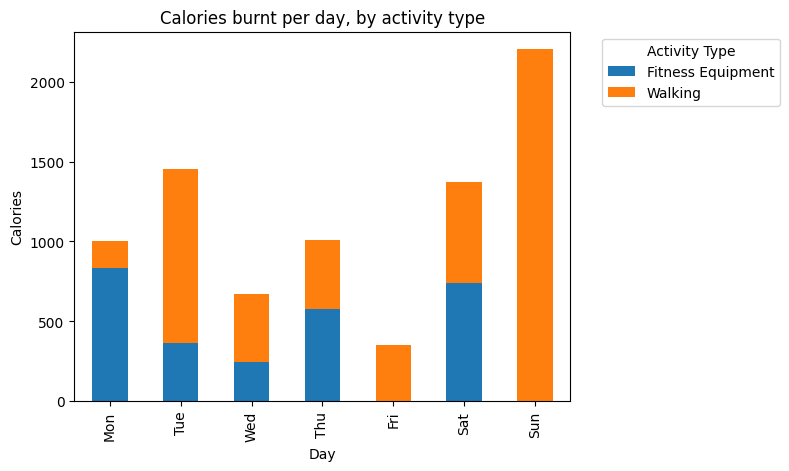

In [151]:
df = pd.DataFrame(ActivityCals)

# Group the dataframe by the 'Day' and 'Activity Type' columns, then sum the values and unstack.
grouped = df.groupby(['Day','Activity Type']).sum()['Value'].unstack()
#print(grouped)

# Reorder bars
order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# Create a stacked bar chart from the grouped data
ax = grouped.loc[order].plot(kind='bar', stacked=True)
plt.xlabel('Day')
plt.ylabel('Calories')
plt.title('Calories burnt per day, by activity type')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()